60201359 이주영 7주차 과제

# 데이터셋 소개 : 기대 수명을 예측하는 회귀모델
본 데이터셋은 WHO의 자료를 기반으로 기대 수명 및 여러 국가의 소득, 교육 및 의료 지출과 같은 기타 요소에 대한 정보가 포함되어 있다. 이러한 요소를 기반으로 기대 수명을 예측하는 회귀 모델을 구축하고자 한다.

* Country 국가: 국가명
* Year 연도: 관측 연도
* Status 상태: 개발 또는 개발 상태
* Life Expectancy 기대수명: 기대수명(년)★★★
* Adult Mortality 성인 사망률: 인구 1000명당 15~60세 사이에 사망할 확률
* Infant Deaths 유아 사망: 인구 1000명당 유아 사망 수
* Alcohol 알코올: 1인당 알코올 소비량(단위: 리터)
* Percentage Expenditure 백분율 지출: 국내총생산(GDP) 대비 건강에 대한 지출 비율
* Hepatitis B B형간염 : 1세 B형간염 예방접종률(백분율)
* Measles홍역: 인구 1000명당 홍역 보고 건수
* BMI: 전체 인구의 평균 체질량 지수
* Under-Five Deaths5세 미만 사망자: 인구 1000명당 5세 미만 사망자 수
* Polio소아마비: 만 1세 소아마비 예방접종률(백분율)
* Total Expenditure 총지출: 총정부지출 대비 보건에 대한 일반정부지출의 비율
* Diphtheria: 1세 아동의 디프테리아 예방접종률(백분율)
* HIV/AIDS: HIV/AIDS로 인한 출생 1000명당 사망
* GDP: 1인당 국내총생산(USD)
* Population 인구 : 해당 국가의 인구
* Thinness 마른 1-19세: 10-19세 어린이의 마른 체형 유병률
* Thinness 마른 5-9세: 5-9세 어린이의 마른 체형 유병률
* Income Composition of Resources 자원의 소득 구성: 자원의 소득구성 측면에서 인간 개발 지수(0에서 1 사이의 지수)
* Schooling 학력 : 학력년수(년)

https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who


In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

df= pd.read_csv('data/Life_Expectancy_Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [13]:
#X 데이터와 y 데이터 분리
#object형인 국가와 개발여부를 삭제, 관측연도 삭제 후 진행함
#결측치 삭제
df = df.drop(['Country','Status','Year'], axis=1)
df.dropna(inplace=True)

X = df.drop(['Life expectancy '], axis=1)
y=df[['Life expectancy ']]

X

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# 변수중요도
가장 상관관계가 낮은 하위 5개를 제거하기 위해 수행

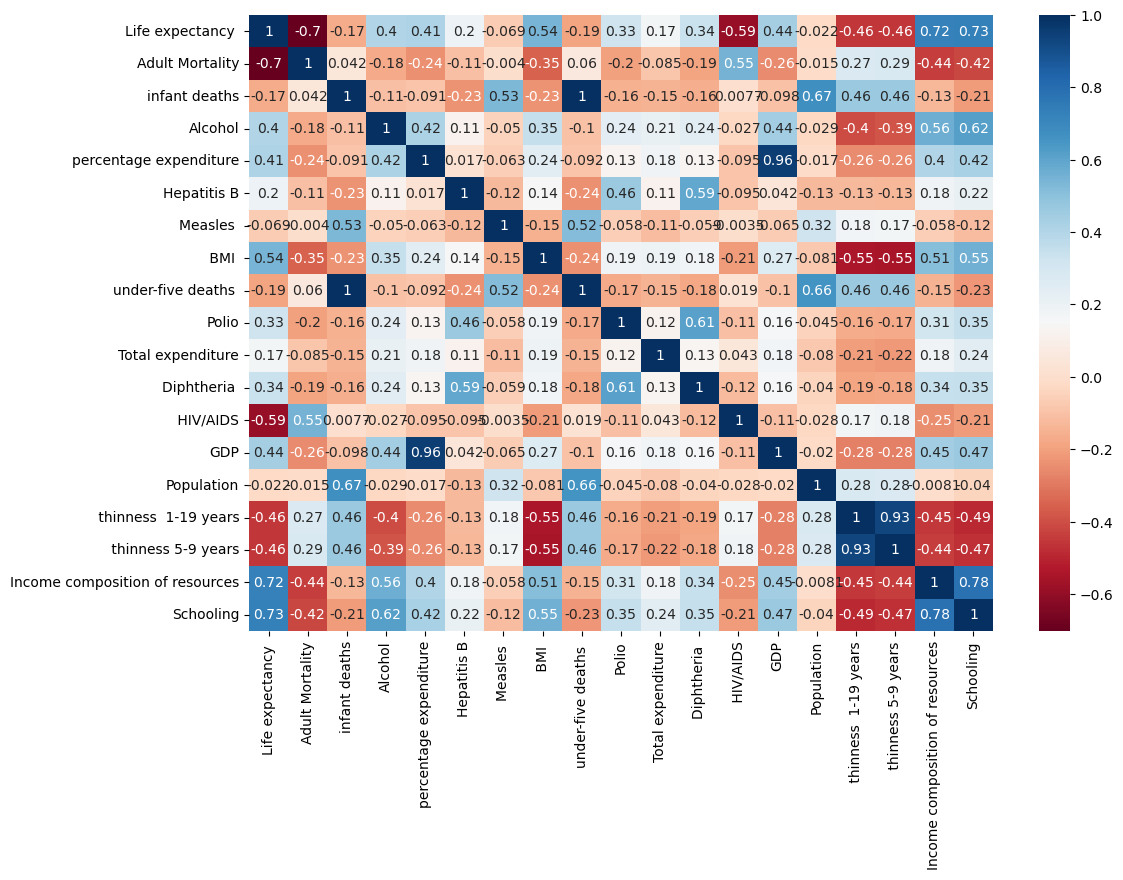

In [14]:
#상관관계 분석
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
corr=df.corr()
sns.heatmap(corr, annot=True, cmap="RdBu")
plt.show()

In [15]:
#LinearRegression모델 만들기
lr=LinearRegression()

#train 데이터와 test 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

#변수중요도 출력
f_scores, p_values = f_regression(X_train, y_train)

feat_importance = pd.DataFrame({'feature': X_train.columns, 'f_score': f_scores, 'p_value': p_values})
feat_importance_sorted = feat_importance.sort_values('f_score', ascending=False)
print(feat_importance_sorted)

                            feature      f_score        p_value
17                        Schooling  1294.468227  1.278908e-190
16  Income composition of resources  1166.091708  3.993393e-177
0                   Adult Mortality  1133.834493  1.287713e-173
11                         HIV/AIDS   580.557531  3.313830e-104
6                              BMI    551.691924  5.377236e-100
14             thinness  1-19 years   300.932393   4.517028e-60
15               thinness 5-9 years   297.966825   1.471139e-59
12                              GDP   261.153084   4.204986e-53
3            percentage expenditure   219.012492   1.691310e-45
2                           Alcohol   217.311655   3.468622e-45
10                      Diphtheria    151.838403   7.294039e-33
8                             Polio   144.148876   2.251629e-31
4                       Hepatitis B    64.304879   2.601342e-15
7                under-five deaths     54.244908   3.363466e-13
9                 Total expenditure    4

C:\Users\jylpi\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
#under-five deaths, Total expenditure, infant deaths, Measles, Population 컬럼 삭제
df = df.drop(['under-five deaths ', 'Total expenditure', 'infant deaths', 'Measles ', 'Population'], axis=1)
X = df.drop(['Life expectancy '], axis=1)
y=df[['Life expectancy ']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)

from sklearn.metrics import r2_score
r2_score_before = r2_score(y_test, y_pred)

# 데이터 스케일링

In [27]:
#데이터 스케일링 : 전처리 단계에서 수행
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.metrics import accuracy_score

scaling_methods = [StandardScaler(),MinMaxScaler(),MaxAbsScaler(),RobustScaler()]

for scaler in scaling_methods:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    lr.fit(X_train_scaled, y_train)
    print(f"{type(scaler).__name__} accuracy: {lr.score(X_test_scaled, y_test)}")

StandardScaler accuracy: 0.8247746959704809
MinMaxScaler accuracy: 0.8247746959704809
MaxAbsScaler accuracy: 0.824774695970481
RobustScaler accuracy: 0.8247746959704811


In [28]:
lr.fit(X_train, y_train)
print(f"스케일링 전 정확도: {lr.score(X_test, y_test)}")


스케일링 전 정확도: 0.8247746959704813


In [29]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = lr_scaled.predict(X_test_scaled)
r2_score_after = r2_score(y_test, y_pred_scaled)

Text(0, 0.5, 'y train')

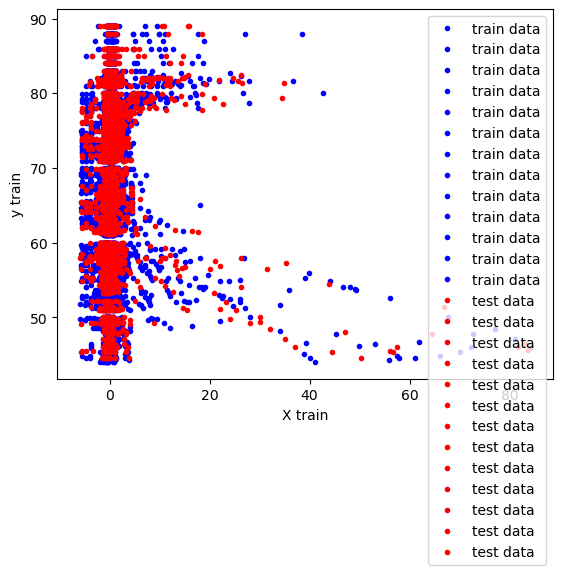

In [56]:
#훈련데이터(파란색)와 테스트데이터(붉은색) 분포 파악하기
plt.plot(X_train_scaled, y_train, 'b.', label= "train data")
plt.plot(X_test_scaled, y_test, 'r.', label= "test data")
plt.legend()
plt.xlabel('X train')
plt.ylabel('y train')

# 모델 적합

In [67]:
#회귀계수 (기울기와 절편)
[lr.coef_, lr.intercept_]

[array([[-1.85623095e-02, -1.21238190e-01,  4.89413141e-04,
          1.15964860e-05,  4.86300851e-02,  9.48243985e-03,
          1.94191040e-02, -4.26519896e-01,  9.53465348e-07,
         -4.45456083e-03, -1.37418533e-02,  9.33712627e+00,
          9.76591122e-01]]),
 array([51.53344637])]

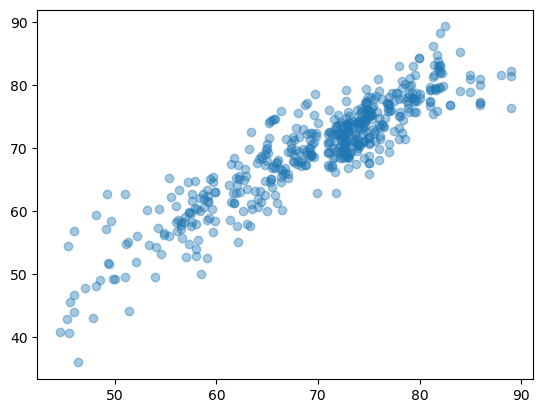

In [68]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_scaled, alpha = 0.4)
plt.show()

# 변수별 상관 확인
변수중요도 상위 3개만 확인하였다.

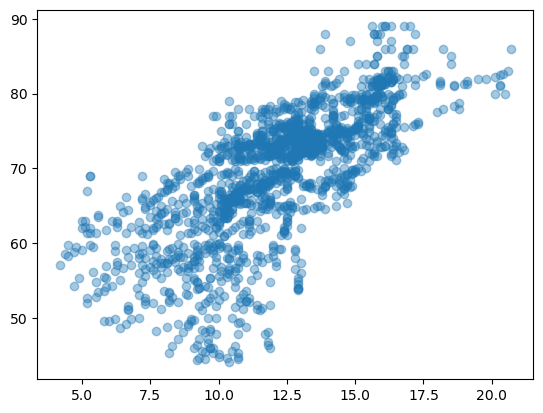

In [69]:
#학력과 집값 간 상관관계
plt.scatter(df[['Schooling']],df[['Life expectancy ']], alpha = 0.4)
plt.show()

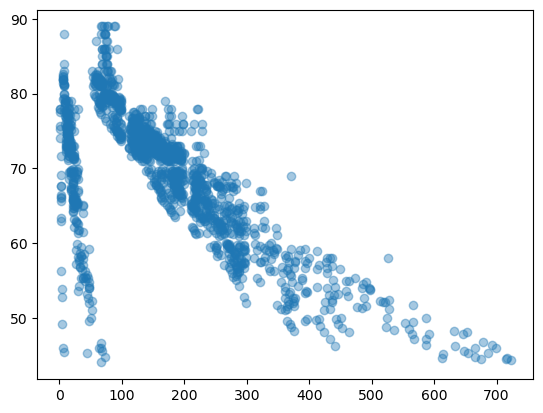

In [70]:
#자원의 소득구성과 집값 간 상관관계
plt.scatter(df[['Adult Mortality']],df[['Life expectancy ']], alpha = 0.4)
plt.show()

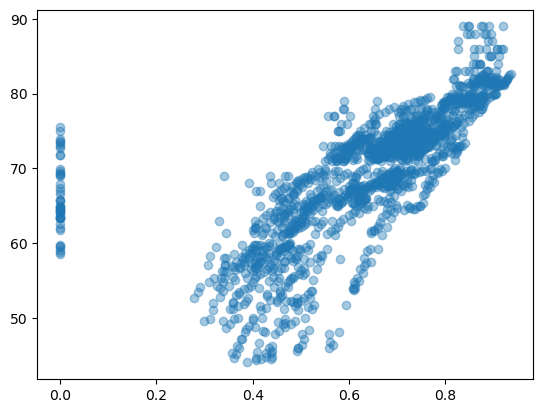

In [71]:
#성인사망률과 집값 간 상관관계
plt.scatter(df[['Income composition of resources']],df[['Life expectancy ']], alpha = 0.4)
plt.show()

# 성능평가

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [73]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2_score_after = r2_score(y_test, y_pred)

In [74]:
print("MAE : %.2f" %mae)
print("MSE : %.2f" %mse)
print("RMSE : %.2f" %rmse)
print("R2 : %.2f" %r2_score_after)

MAE : 2.88
MSE : 14.35
RMSE : 3.79
R2 : 0.82


후기

7주차 수업에서 맨하튼 집값 회귀모델보다 mae mse rmse r2값이 좋게 나와 좋았다. 다만 훈련데이터와 테스트데이터를 plot함수로 시각화 할 때 컬럼을 구분하여 표현하려고 하니 너무 복잡해지고 오류가 나 통합된 모습으로 시각화를 하게 되었다. X변수가 10개가 넘어 더 적합한 그래프를 찾아보아야겠다고 생각했다.